# Introduction

The aim of this project is to analyse data from the National Parks Service about endangered species in different parks, and identify any patterns or themes in relation to the conservation statuses of these species.

Below are the questions that this analysis will seek to answer:
- What is the distribution of conservation status for species?
- Which species are more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park, and what was their distribution?

### Import Python Modules

In [186]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the Data

#### species Dataset

The `species_info.csv` dataset has the following columns of data:
- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status

In [44]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations Dataset

The `observations.csv` dataset had the following columns of data:
- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [22]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics

Next, I have used the shape command to find out how many rows and columns there are in each dataset. `species` has 5,824 rows and 4 columns, whilst `observations` has 23,296 rows and 3 columns.

In [32]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


### Exploring the Data

Firstly, I want to find out how many uniques species there are in the dataset. Using the `scientific_name` column, I have discovered that there are 5,541 species in `species`.

In [46]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


Next, I want to understand the different types of species in the dataset. I can do this using the `category` column. There are 7 categories in `species`, including animals and plants.

In [50]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


To dig deeper into this, I have grouped the `category` column by size in order to see how many species there are for each type. In this dataset, the Vascular Plant category has the most amount of species (4,470), whilst the Reptile category has the fewest (79).

In [52]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to look at is `conservation_status`. In `species` there are 4 different conservation statuses, as well as `nan` values. In the next step I will look at how many `nan` values there are to determine what the missing data could mean in the context of this dataset.

In [54]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


To get a better understanding of how many species have been assigned a `conservation_status`, I have grouped the data. There are 5,633 `nan` values, and 191 not null values. Given that the majority of the dataset has been assigned `nan` as a `conservation_status` we can assume that these species are without concerns in relation to endangerment.

In [79]:
print(f"na values: {species.conservation_status.isna().sum()}")
print(f"not null values: {species.conservation_status.notnull().sum()}")
species.groupby("conservation_status").size()

na values: 5633
not null values: 191


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Moving on from `species`, I will now look at `observations`. Using `park_name`, I have identified 4 National Parks in the `observations` dataset.

In [92]:
print(f"number of National Parks: {observations.park_name.nunique()}")
print(f"National Park names: {observations.park_name.unique()}")

number of National Parks: 4
National Park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


The total amount of observations in `observations` is 3,314,739.

In [95]:
print(f"total number of observations: {observations.observations.sum()}")

total number of observations: 3314739


### Analysis

This section will analyse the data that was explored in the previous section. Firstly, I will look at the `conservation_status` in `species`.

In the data exploration section, I found that this column contained `nan` values. `nan` was given to entries that did not face any endangerment risk, therefore I have replaced `nan` with `No Intervention`. 

In [125]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next, in order to focus on the species that have either a `In Recovery`, `Species of Concern`, `Threatened`, or `Endangered` conservation status, I've excluded the entries with a `No Intervention` status.

Below is a table and chart that looks into the `category` split amongst each `conservation_status`.

`Species of Concern` is the most populated conservation status, with the `Bird` category having the most amount of entries under this status (72), followed by `Vascular Plant` (43) and `Mammal` (28). Amongst the `Endangered` category, `Mammal` has the most entries, followed by `Bird` and `Fish`. The categroies `Nonvascular` and `Reptiles` have very low counts across all statuses. 


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


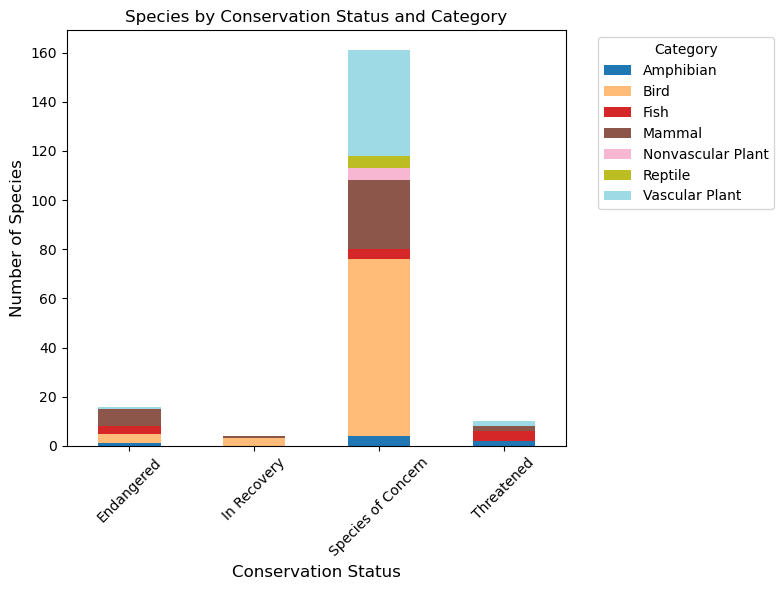

In [194]:
filtered_species = species[species['conservation_status'] != 'No Intervention']

from IPython.display import display

pivot_table = filtered_species.pivot_table(columns='category', index='conservation_status', values='scientific_name', aggfunc='count', fill_value=0)
display(pivot_table)

# Group by conservation_status and category
status_category_counts = filtered_species.groupby(['conservation_status', 'category']).size().unstack(fill_value=0)

# Plot stacked bar chart
status_category_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')

plt.title('Species by Conservation Status and Category')
plt.ylabel('Number of Species', size=12)
plt.xlabel('Conservation Status', size=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()